In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#carregandodatasets
itenscontrato = pd.read_csv('itensC.csv', delimiter = ';')



C:\Users\campe\AppData\Local\Temp\ipykernel_8656\1757884609.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  itenscontrato = pd.read_csv('itensC.csv', delimiter = ';')


In [3]:
contratos= pd.read_csv('contratos.csv', delimiter = ';')

## passo 1: limpeza do dataset itens_contratos

In [4]:
itenscontrato.head()

,Contratação,ID Item,Item,Qtde Original,VL. Unit.Original,Total Aditivada/Suprimida,VL. Unit.Aditivado/Suprimido,data_extracao
0,2011000006,57334,VIDEOLAPAROSCOPIO - DEFINICAO: 1920X1080 LINHA...,1,277000,0,0,22/11/2023
1,2011000006,59736,"VIDEOLAPAROSCOPIO - DEFINICAO: 450 LINHAS, SEN...",1,223000,0,0,22/11/2023
2,2011000008,52700,"NOBREAK - NUMERO FASES: MONOFASICO, TENSAO ENT...",2,630,0,0,22/11/2023
3,2011000008,52827,"ESTABILIZADOR DE VOLTAGEM - POTENCIA: 0,45 KVA...",40,134,0,0,22/11/2023
4,2011000008,54240,"HARD DISK EXTERNO - TAMANHO: 3 1/2 ``, CAPACID...",3,290,0,0,22/11/2023


In [5]:
itenscontrato.describe()

,Contratação,ID Item
count,2.790890e+05,279089.000000
mean,2.016601e+09,82702.609909
std,3.668613e+06,44768.061115
min,2.011000e+09,16.000000
25%,2.013010e+09,56495.000000
50%,2.016002e+09,77774.000000
75%,2.020002e+09,117596.000000
max,2.023010e+09,184070.000000


In [6]:
itenscontrato.tail()

,Contratação,ID Item,Item,Qtde Original,VL. Unit.Original,Total Aditivada/Suprimida,VL. Unit.Aditivado/Suprimido,data_extracao
279084,2023009621,82959,"CADEIRA - TIPO: PRESIDENTE, BASE: GIRATORIA -...",22,"878,9",0,0,22/11/2023
279085,2023009622,168358,"SOFA/SOFANETE - QUANTIDADE LUGARES: 1 LUGAR, M...",6,"2548,5972",0,0,22/11/2023
279086,2023009623,177543,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",78,"7512,8077",0,0,22/11/2023
279087,2023009624,167751,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",15,3180,0,0,22/11/2023
279088,2023009624,167794,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",18,"2082,77",0,0,22/11/2023


In [7]:
itenscontrato.dtypes

Contratação                      int64
ID Item                          int64
Item                            object
Qtde Original                   object
VL. Unit.Original               object
Total Aditivada/Suprimida       object
VL. Unit.Aditivado/Suprimido    object
data_extracao                   object
dtype: object

In [8]:
#convertendo variaveis 
# Converter 'Qtde Original' para int64 e outras para float
itenscontrato[['VL. Unit.Original', 'Total Aditivada/Suprimida', 'VL. Unit.Aditivado/Suprimido']] = itenscontrato[['VL. Unit.Original', 'Total Aditivada/Suprimida', 'VL. Unit.Aditivado/Suprimido']].apply(lambda x: x.str.replace(',', '.')).astype(float).round(2)


In [9]:
itenscontrato['Qtde Original'] = itenscontrato['Qtde Original'].str.replace(',', '.').astype(float)


In [10]:
itenscontrato.dtypes

Contratação                       int64
ID Item                           int64
Item                             object
Qtde Original                   float64
VL. Unit.Original               float64
Total Aditivada/Suprimida       float64
VL. Unit.Aditivado/Suprimido    float64
data_extracao                    object
dtype: object

In [11]:
#fazendo a remoção de colunas denecessarias
itenscontratoL=itenscontrato.drop('data_extracao',axis=1)
itenscontratoL

,Contratação,ID Item,Item,Qtde Original,VL. Unit.Original,Total Aditivada/Suprimida,VL. Unit.Aditivado/Suprimido
0,2011000006,57334,VIDEOLAPAROSCOPIO - DEFINICAO: 1920X1080 LINHA...,1.0,277000.00,0.0,0.0
1,2011000006,59736,"VIDEOLAPAROSCOPIO - DEFINICAO: 450 LINHAS, SEN...",1.0,223000.00,0.0,0.0
2,2011000008,52700,"NOBREAK - NUMERO FASES: MONOFASICO, TENSAO ENT...",2.0,630.00,0.0,0.0
3,2011000008,52827,"ESTABILIZADOR DE VOLTAGEM - POTENCIA: 0,45 KVA...",40.0,134.00,0.0,0.0
4,2011000008,54240,"HARD DISK EXTERNO - TAMANHO: 3 1/2 ``, CAPACID...",3.0,290.00,0.0,0.0
...,...,...,...,...,...,...,...
279084,2023009621,82959,"CADEIRA - TIPO: PRESIDENTE, BASE: GIRATORIA -...",22.0,878.90,NaN,0.0
279085,2023009622,168358,"SOFA/SOFANETE - QUANTIDADE LUGARES: 1 LUGAR, M...",6.0,2548.60,NaN,0.0
279086,2023009623,177543,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",78.0,7512.81,NaN,0.0
279087,2023009624,167751,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",15.0,3180.00,NaN,0.0


In [12]:
#RENOMEANDO COLUNA
itenscontratoL.rename(columns={'VL. Unit.Original':'valor unitario'},inplace=True)
itenscontratoL

,Contratação,ID Item,Item,Qtde Original,valor unitario,Total Aditivada/Suprimida,VL. Unit.Aditivado/Suprimido
0,2011000006,57334,VIDEOLAPAROSCOPIO - DEFINICAO: 1920X1080 LINHA...,1.0,277000.00,0.0,0.0
1,2011000006,59736,"VIDEOLAPAROSCOPIO - DEFINICAO: 450 LINHAS, SEN...",1.0,223000.00,0.0,0.0
2,2011000008,52700,"NOBREAK - NUMERO FASES: MONOFASICO, TENSAO ENT...",2.0,630.00,0.0,0.0
3,2011000008,52827,"ESTABILIZADOR DE VOLTAGEM - POTENCIA: 0,45 KVA...",40.0,134.00,0.0,0.0
4,2011000008,54240,"HARD DISK EXTERNO - TAMANHO: 3 1/2 ``, CAPACID...",3.0,290.00,0.0,0.0
...,...,...,...,...,...,...,...
279084,2023009621,82959,"CADEIRA - TIPO: PRESIDENTE, BASE: GIRATORIA -...",22.0,878.90,NaN,0.0
279085,2023009622,168358,"SOFA/SOFANETE - QUANTIDADE LUGARES: 1 LUGAR, M...",6.0,2548.60,NaN,0.0
279086,2023009623,177543,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",78.0,7512.81,NaN,0.0
279087,2023009624,167751,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",15.0,3180.00,NaN,0.0


In [13]:
#Dividindoo a coluna item 
itenscontratoL[['item', 'Caracteristicas']] = itenscontratoL['Item'].str.extract(r'^(.*?)\s*-\s*(.*)$')



In [14]:
itenscontratoL

,Contratação,ID Item,Item,Qtde Original,valor unitario,Total Aditivada/Suprimida,VL. Unit.Aditivado/Suprimido,item,Caracteristicas
0,2011000006,57334,VIDEOLAPAROSCOPIO - DEFINICAO: 1920X1080 LINHA...,1.0,277000.00,0.0,0.0,VIDEOLAPAROSCOPIO,"DEFINICAO: 1920X1080 LINHAS, SENSIBILIDADE: 3 ..."
1,2011000006,59736,"VIDEOLAPAROSCOPIO - DEFINICAO: 450 LINHAS, SEN...",1.0,223000.00,0.0,0.0,VIDEOLAPAROSCOPIO,"DEFINICAO: 450 LINHAS, SENSIBILIDADE: 3 LX, TE..."
2,2011000008,52700,"NOBREAK - NUMERO FASES: MONOFASICO, TENSAO ENT...",2.0,630.00,0.0,0.0,NOBREAK,"NUMERO FASES: MONOFASICO, TENSAO ENTRADA: 127 ..."
3,2011000008,52827,"ESTABILIZADOR DE VOLTAGEM - POTENCIA: 0,45 KVA...",40.0,134.00,0.0,0.0,ESTABILIZADOR DE VOLTAGEM,"POTENCIA: 0,45 KVA, TENSAO ENTRADA: 110/220 V"
4,2011000008,54240,"HARD DISK EXTERNO - TAMANHO: 3 1/2 ``, CAPACID...",3.0,290.00,0.0,0.0,HARD DISK EXTERNO,"TAMANHO: 3 1/2 ``, CAPACIDADE: 1TB, VELOCIDADE..."
...,...,...,...,...,...,...,...,...,...
279084,2023009621,82959,"CADEIRA - TIPO: PRESIDENTE, BASE: GIRATORIA -...",22.0,878.90,NaN,0.0,CADEIRA,"TIPO: PRESIDENTE, BASE: GIRATORIA - RODIZIO, A..."
279085,2023009622,168358,"SOFA/SOFANETE - QUANTIDADE LUGARES: 1 LUGAR, M...",6.0,2548.60,NaN,0.0,SOFA/SOFANETE,"QUANTIDADE LUGARES: 1 LUGAR, MATERIAL: COURO E..."
279086,2023009623,177543,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",78.0,7512.81,NaN,0.0,CONDICIONADOR AR,"TIPO: SPLIT INVERTER, CAPACIDADE REFRIGERACAO:..."
279087,2023009624,167751,"CONDICIONADOR AR - TIPO: SPLIT INVERTER, CAPAC...",15.0,3180.00,NaN,0.0,CONDICIONADOR AR,"TIPO: SPLIT INVERTER, CAPACIDADE REFRIGERACAO:..."


In [15]:
itenscontratoL.drop(['Item','Caracteristicas'],axis=1,inplace=True)

In [16]:
#valores nulos
proporcao = itenscontratoL.isnull().mean().sort_values(ascending=False)
proporcao

Total Aditivada/Suprimida       0.060715
valor unitario                  0.000011
Contratação                     0.000000
ID Item                         0.000000
Qtde Original                   0.000000
VL. Unit.Aditivado/Suprimido    0.000000
item                            0.000000
dtype: float64

In [17]:
#verificando possiveis valores ausentes
(itenscontratoL==0).mean().sort_values(ascending=False)*100

VL. Unit.Aditivado/Suprimido    99.199538
Total Aditivada/Suprimida       92.768615
valor unitario                   0.235767
Qtde Original                    0.030815
Contratação                      0.000000
ID Item                          0.000000
item                             0.000000
dtype: float64

In [18]:
#como as colunas VL. Unit.Aditivado/Suprimido e Total Aditivada/Suprimida tem uma grande quantidade de valor 0 e nao vai ser mt util para minha 
#analise entao decidi dropar as duas pra reduzir a dimensao
itenscontratoL = itenscontratoL.drop(['VL. Unit.Aditivado/Suprimido', 'Total Aditivada/Suprimida'], axis=1)


In [19]:
#dataset limpo
itenscontratoL

,Contratação,ID Item,Qtde Original,valor unitario,item
0,2011000006,57334,1.0,277000.00,VIDEOLAPAROSCOPIO
1,2011000006,59736,1.0,223000.00,VIDEOLAPAROSCOPIO
2,2011000008,52700,2.0,630.00,NOBREAK
3,2011000008,52827,40.0,134.00,ESTABILIZADOR DE VOLTAGEM
4,2011000008,54240,3.0,290.00,HARD DISK EXTERNO
...,...,...,...,...,...
279084,2023009621,82959,22.0,878.90,CADEIRA
279085,2023009622,168358,6.0,2548.60,SOFA/SOFANETE
279086,2023009623,177543,78.0,7512.81,CONDICIONADOR AR
279087,2023009624,167751,15.0,3180.00,CONDICIONADOR AR


## passo 2: limpeza do dataset contratos

In [20]:
contratos

,Contratação,Status Contratação,Data Contratação,Unidade,Processo,Objeto,Tipo de Aquisição,Critério de Julgamento,Data Início Vigência,Data Fim Vigência,Fornecedor,CPF/CNPJ,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$),Valor Total Liquidado (R$),Valor Total Pago (R$),Data Public DEORJ,data_extracao
0,2023007399,Em Aberto,15/09/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/028022/2021,Estação total Kolida,Pregão Eletrônico,Menor Preço,NaN,NaN,TEOMAC COMÉRCIO E REPRESENTAÇÕES LTDA,01.566.632/0001-80,24890,NaN,NaN,NaN,NaN,22/11/2023
1,2023007400,Em Aberto,15/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,SEI-08/007/6373-B/2021,emp,Solicitação de Compra,Menor Preço,19/09/2022,18/09/2023,MASTERLAB COMERCIAL LTDA,12.235.794/0001-51,247947,"247.947,00",NaN,NaN,NaN,22/11/2023
2,2023007401,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,SEI-08/007/5239-A/2023,EMP,Solicitação de Compra,Menor Preço,30/08/2023,29/08/2024,CEI COMERCIO EXPORTACAO E IMPORTACAO DE MATERI...,40.175.705/0001-64,112200,NaN,NaN,NaN,NaN,22/11/2023
3,2023007402,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,SEI-08/007/2269-A/2023,empenho,Solicitação de Compra,Menor Preço,28/08/2023,27/08/2024,UNIQUE DISTRIBUIDORA DE MEDICAMENTOS EIRELI,23.864.942/0001-13,1100,"1.100,00",NaN,NaN,28/08/2023,22/11/2023
4,2023007403,Ativo,18/09/2023,FES - FUNDO ESTADUAL DE SAÚDE,SEI-080001/019064-B/2022,aquisição de medicamentos,Solicitação de Compra,Menor Preço,10/04/2023,09/04/2024,BIOHOSP PRODUTOS HOSPITARES S/A,18.269.125/0001-87,"77257,8","77.257,80",NaN,NaN,10/04/2023,22/11/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99675,2023009447,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/058003/2023,pagamento único da empresa júnior da UERJ Inic...,Pequenas Compras,Menor Preço,NaN,NaN,INICIATIVA EMPRESA JÚNIOR,05.210.982/0001-60,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99676,2023009448,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/057986/2023,pagamento único da empresa júnior da UERJ Dyst...,Pequenas Compras,Menor Preço,NaN,NaN,ASSOCIACAO DE ODONTOLOGIA DA UNIVERSIDADE DO E...,48.374.796/0001-79,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99677,2023009449,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/058019/2023,pagamento único da empresa júnior da UERJ Tit...,Pequenas Compras,Menor Preço,NaN,NaN,TITANUS SOLUÇÕES SUSTENTÁVEIS,19.105.420/0001-60,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99678,2023009450,Em Aberto,10/11/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,SEI-080007/007399/2023,LOCAÇÃO DE EQUIPAMENTOS LABORATORIAIS JUNTO A...,Pregão Eletrônico,Menor Preço,NaN,NaN,PROCARE COMÉRCIO DE PRODUTOS HOSPITALARES LTDA.,05.050.260/0001-95,"1419899,89",NaN,NaN,NaN,NaN,22/11/2023


In [21]:
contratos.describe()

,Contratação
count,9.968000e+04
mean,2.017135e+09
std,3.719048e+06
min,2.011000e+09
25%,2.014003e+09
50%,2.017001e+09
75%,2.021001e+09
max,2.023010e+09


In [22]:
contratos.tail()

,Contratação,Status Contratação,Data Contratação,Unidade,Processo,Objeto,Tipo de Aquisição,Critério de Julgamento,Data Início Vigência,Data Fim Vigência,Fornecedor,CPF/CNPJ,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$),Valor Total Liquidado (R$),Valor Total Pago (R$),Data Public DEORJ,data_extracao
99675,2023009447,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/058003/2023,pagamento único da empresa júnior da UERJ Inic...,Pequenas Compras,Menor Preço,NaN,NaN,INICIATIVA EMPRESA JÚNIOR,05.210.982/0001-60,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99676,2023009448,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/057986/2023,pagamento único da empresa júnior da UERJ Dyst...,Pequenas Compras,Menor Preço,NaN,NaN,ASSOCIACAO DE ODONTOLOGIA DA UNIVERSIDADE DO E...,48.374.796/0001-79,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99677,2023009449,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,SEI-260007/058019/2023,pagamento único da empresa júnior da UERJ Tit...,Pequenas Compras,Menor Preço,NaN,NaN,TITANUS SOLUÇÕES SUSTENTÁVEIS,19.105.420/0001-60,7000,"7.000,00",NaN,NaN,NaN,22/11/2023
99678,2023009450,Em Aberto,10/11/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,SEI-080007/007399/2023,LOCAÇÃO DE EQUIPAMENTOS LABORATORIAIS JUNTO A...,Pregão Eletrônico,Menor Preço,NaN,NaN,PROCARE COMÉRCIO DE PRODUTOS HOSPITALARES LTDA.,05.050.260/0001-95,"1419899,89",NaN,NaN,NaN,NaN,22/11/2023
99679,2023009451,Em Aberto,10/11/2023,FUNESPOM - FUNDO ESP. POLÍCIA MILITAR RJ,SEI-350207/000567/2023,ontratação EMERGENCIAL por 180 cento e oitenta...,Dispensa - Especial,Menor Preço,10/11/2023,10/05/2024,PLANETA CONSTRUÇÕES CIVIS COMERCIO E SERVIÇOS ...,20.345.162/0001-79,660000,"660.000,00",NaN,NaN,10/11/2023,22/11/2023


In [23]:
#removendo colunas denecessarias para minha analise
contratos.drop(['Processo','CPF/CNPJ','Data Public DEORJ','data_extracao'],axis=1,inplace=True)

In [24]:
contratos

,Contratação,Status Contratação,Data Contratação,Unidade,Objeto,Tipo de Aquisição,Critério de Julgamento,Data Início Vigência,Data Fim Vigência,Fornecedor,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$),Valor Total Liquidado (R$),Valor Total Pago (R$)
0,2023007399,Em Aberto,15/09/2023,UERJ - ADMINISTRACAO CENTRAL,Estação total Kolida,Pregão Eletrônico,Menor Preço,NaN,NaN,TEOMAC COMÉRCIO E REPRESENTAÇÕES LTDA,24890,NaN,NaN,NaN
1,2023007400,Em Aberto,15/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,emp,Solicitação de Compra,Menor Preço,19/09/2022,18/09/2023,MASTERLAB COMERCIAL LTDA,247947,"247.947,00",NaN,NaN
2,2023007401,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,EMP,Solicitação de Compra,Menor Preço,30/08/2023,29/08/2024,CEI COMERCIO EXPORTACAO E IMPORTACAO DE MATERI...,112200,NaN,NaN,NaN
3,2023007402,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,empenho,Solicitação de Compra,Menor Preço,28/08/2023,27/08/2024,UNIQUE DISTRIBUIDORA DE MEDICAMENTOS EIRELI,1100,"1.100,00",NaN,NaN
4,2023007403,Ativo,18/09/2023,FES - FUNDO ESTADUAL DE SAÚDE,aquisição de medicamentos,Solicitação de Compra,Menor Preço,10/04/2023,09/04/2024,BIOHOSP PRODUTOS HOSPITARES S/A,"77257,8","77.257,80",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99675,2023009447,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Inic...,Pequenas Compras,Menor Preço,NaN,NaN,INICIATIVA EMPRESA JÚNIOR,7000,"7.000,00",NaN,NaN
99676,2023009448,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Dyst...,Pequenas Compras,Menor Preço,NaN,NaN,ASSOCIACAO DE ODONTOLOGIA DA UNIVERSIDADE DO E...,7000,"7.000,00",NaN,NaN
99677,2023009449,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Tit...,Pequenas Compras,Menor Preço,NaN,NaN,TITANUS SOLUÇÕES SUSTENTÁVEIS,7000,"7.000,00",NaN,NaN
99678,2023009450,Em Aberto,10/11/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,LOCAÇÃO DE EQUIPAMENTOS LABORATORIAIS JUNTO A...,Pregão Eletrônico,Menor Preço,NaN,NaN,PROCARE COMÉRCIO DE PRODUTOS HOSPITALARES LTDA.,"1419899,89",NaN,NaN,NaN


In [25]:
contratos.dtypes

Contratação                                                   int64
Status Contratação                                           object
Data Contratação                                             object
Unidade                                                      object
Objeto                                                       object
Tipo de Aquisição                                            object
Critério de Julgamento                                       object
Data Início Vigência                                         object
Data Fim Vigência                                            object
Fornecedor                                                   object
Valor Total Contrato/Valor Estimado para Contratação (R$)    object
Valor Total Empenhado (R$)                                   object
Valor Total Liquidado (R$)                                   object
 Valor Total Pago (R$)                                       object
dtype: object

In [26]:
contratos.columns = contratos.columns.str.strip()

In [27]:
# Converter colunas para float
colunas_numericas = ['Valor Total Contrato/Valor Estimado para Contratação (R$)', 'Valor Total Empenhado (R$)', 'Valor Total Liquidado (R$)', 'Valor Total Pago (R$)']
for coluna in colunas_numericas :
    contratos[coluna] = contratos[coluna].str.replace('.', '').str.replace(',', '.').astype(float).round(2)

In [28]:
contratos.dtypes

Contratação                                                    int64
Status Contratação                                            object
Data Contratação                                              object
Unidade                                                       object
Objeto                                                        object
Tipo de Aquisição                                             object
Critério de Julgamento                                        object
Data Início Vigência                                          object
Data Fim Vigência                                             object
Fornecedor                                                    object
Valor Total Contrato/Valor Estimado para Contratação (R$)    float64
Valor Total Empenhado (R$)                                   float64
Valor Total Liquidado (R$)                                   float64
Valor Total Pago (R$)                                        float64
dtype: object

In [29]:
#verificando percentual de valor ausente
(contratos).isna().mean().sort_values(ascending=False)*100

Valor Total Pago (R$)                                        63.480136
Valor Total Liquidado (R$)                                   61.315209
Valor Total Empenhado (R$)                                   45.577849
Data Fim Vigência                                            24.598716
Data Início Vigência                                         24.480337
Objeto                                                        0.531701
Tipo de Aquisição                                             0.529695
Contratação                                                   0.000000
Status Contratação                                            0.000000
Data Contratação                                              0.000000
Unidade                                                       0.000000
Critério de Julgamento                                        0.000000
Fornecedor                                                    0.000000
Valor Total Contrato/Valor Estimado para Contratação (R$)     0.000000
dtype:

In [30]:
#dropando colunas denecessárias e que possui muitos valores ausentes
contratos.drop(['Valor Total Pago (R$)','Valor Total Liquidado (R$)','Data Fim Vigência','Data Início Vigência' ],axis=1,inplace=True)

In [31]:
contratos

,Contratação,Status Contratação,Data Contratação,Unidade,Objeto,Tipo de Aquisição,Critério de Julgamento,Fornecedor,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$)
0,2023007399,Em Aberto,15/09/2023,UERJ - ADMINISTRACAO CENTRAL,Estação total Kolida,Pregão Eletrônico,Menor Preço,TEOMAC COMÉRCIO E REPRESENTAÇÕES LTDA,24890.00,NaN
1,2023007400,Em Aberto,15/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,emp,Solicitação de Compra,Menor Preço,MASTERLAB COMERCIAL LTDA,247947.00,247947.0
2,2023007401,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,EMP,Solicitação de Compra,Menor Preço,CEI COMERCIO EXPORTACAO E IMPORTACAO DE MATERI...,112200.00,NaN
3,2023007402,Em Aberto,18/09/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,empenho,Solicitação de Compra,Menor Preço,UNIQUE DISTRIBUIDORA DE MEDICAMENTOS EIRELI,1100.00,1100.0
4,2023007403,Ativo,18/09/2023,FES - FUNDO ESTADUAL DE SAÚDE,aquisição de medicamentos,Solicitação de Compra,Menor Preço,BIOHOSP PRODUTOS HOSPITARES S/A,77257.80,77257.8
...,...,...,...,...,...,...,...,...,...,...
99675,2023009447,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Inic...,Pequenas Compras,Menor Preço,INICIATIVA EMPRESA JÚNIOR,7000.00,7000.0
99676,2023009448,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Dyst...,Pequenas Compras,Menor Preço,ASSOCIACAO DE ODONTOLOGIA DA UNIVERSIDADE DO E...,7000.00,7000.0
99677,2023009449,Em Aberto,10/11/2023,UERJ - ADMINISTRACAO CENTRAL,pagamento único da empresa júnior da UERJ Tit...,Pequenas Compras,Menor Preço,TITANUS SOLUÇÕES SUSTENTÁVEIS,7000.00,7000.0
99678,2023009450,Em Aberto,10/11/2023,FSERJ - FUNDAÇÃO SAÚDE DO EST. DO RIO DE JANEIRO,LOCAÇÃO DE EQUIPAMENTOS LABORATORIAIS JUNTO A...,Pregão Eletrônico,Menor Preço,PROCARE COMÉRCIO DE PRODUTOS HOSPITALARES LTDA.,1419899.89,NaN


#### Vou preencher os valores ausentes de 'valor total empenhado' com 0, pois acredito que não vai afetar significativamente na análise final.

In [32]:
#imputando valor total empenhado
contratos['Valor Total Empenhado (R$)'].fillna(0, inplace=True)


In [33]:
(contratos).isna().sum()

Contratação                                                    0
Status Contratação                                             0
Data Contratação                                               0
Unidade                                                        0
Objeto                                                       530
Tipo de Aquisição                                            528
Critério de Julgamento                                         0
Fornecedor                                                     0
Valor Total Contrato/Valor Estimado para Contratação (R$)      0
Valor Total Empenhado (R$)                                     0
dtype: int64

#### a variavel  "Tipo de Aquisição"  possui poucos  valores ausente entao vou imputar com a mediana


In [34]:
#na variavel  Tipo de Aquisição tem  poucos valores ausentes entao vou imputar com a mediana
moda = contratos['Tipo de Aquisição'].mode()[0]
# Preencher valores ausentes com a moda
contratos['Tipo de Aquisição'].fillna(moda, inplace=True)

In [35]:
(contratos).isna().mean().sort_values(ascending=False)*100

Objeto                                                       0.531701
Contratação                                                  0.000000
Status Contratação                                           0.000000
Data Contratação                                             0.000000
Unidade                                                      0.000000
Tipo de Aquisição                                            0.000000
Critério de Julgamento                                       0.000000
Fornecedor                                                   0.000000
Valor Total Contrato/Valor Estimado para Contratação (R$)    0.000000
Valor Total Empenhado (R$)                                   0.000000
dtype: float64

#### na coluna "objeto" eu optei preencher os valores ausentes com 'desconhecido'

In [36]:
contratos['Objeto'].fillna("desconhecido", inplace=True)

In [37]:
(contratos).isna().mean().sort_values(ascending=False)*100

Contratação                                                  0.0
Status Contratação                                           0.0
Data Contratação                                             0.0
Unidade                                                      0.0
Objeto                                                       0.0
Tipo de Aquisição                                            0.0
Critério de Julgamento                                       0.0
Fornecedor                                                   0.0
Valor Total Contrato/Valor Estimado para Contratação (R$)    0.0
Valor Total Empenhado (R$)                                   0.0
dtype: float64

# passo 3: correlacionando as duas tabelas

In [38]:
tabelacorrelacionada = pd.merge(itenscontratoL, contratos, on='Contratação', how='inner')
tabelacorrelacionada

,Contratação,ID Item,Qtde Original,valor unitario,item,Status Contratação,Data Contratação,Unidade,Objeto,Tipo de Aquisição,Critério de Julgamento,Fornecedor,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$)
0,2011000006,57334,1.0,277000.00,VIDEOLAPAROSCOPIO,Cancelado,12/05/2011,PMERJ - POLÍCIA MILITAR DO ESTADO DO RIO DE JA...,AQUISIÇÃO DE VIDEOLAPAROSCÓPIO.,Solicitação de Compra,Menor Preço,CONFIANCE MEDICAL PRODUTOS MEDICOS S/A,500000.00,0.0
1,2011000006,59736,1.0,223000.00,VIDEOLAPAROSCOPIO,Cancelado,12/05/2011,PMERJ - POLÍCIA MILITAR DO ESTADO DO RIO DE JA...,AQUISIÇÃO DE VIDEOLAPAROSCÓPIO.,Solicitação de Compra,Menor Preço,CONFIANCE MEDICAL PRODUTOS MEDICOS S/A,500000.00,0.0
2,2011000008,52700,2.0,630.00,NOBREAK,Cancelado,18/05/2011,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,Menor Preço,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0
3,2011000008,52827,40.0,134.00,ESTABILIZADOR DE VOLTAGEM,Cancelado,18/05/2011,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,Menor Preço,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0
4,2011000008,54240,3.0,290.00,HARD DISK EXTERNO,Cancelado,18/05/2011,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,Menor Preço,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279084,2023009621,82959,22.0,878.90,CADEIRA,Em Aprovação,21/11/2023,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de mobiliário ARP 0082023,Solicitação de Compra,Menor Preço,POWER B COMERCIO E SERVICOS EIRELI,657520.75,0.0
279085,2023009622,168358,6.0,2548.60,SOFA/SOFANETE,Em Aprovação,21/11/2023,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de mobiliário ARP 0092023,Solicitação de Compra,Menor Preço,SOFA CENTER IND E COM DE MOVEIS LTDA,15291.58,0.0
279086,2023009623,177543,78.0,7512.81,CONDICIONADOR AR,Em Aprovação,21/11/2023,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de arcondicionado ARP 050,Solicitação de Compra,Menor Preço,MASTER ELETRODOMÉSTICOS EIRELI,585999.00,0.0
279087,2023009624,167751,15.0,3180.00,CONDICIONADOR AR,Em Aprovação,21/11/2023,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de arcondicionado ARP 0512023,Solicitação de Compra,Menor Preço,ARAUJO DISTRIBUIDORA E COMERCIO EIRELI,85189.86,0.0


# Passo 4: Visualização grafica e insights

In [39]:
# Convertendo a coluna de datas para o tipo datetime
tabelacorrelacionada['Data Contratação'] = pd.to_datetime(tabelacorrelacionada['Data Contratação'], format='%d/%m/%Y', errors='coerce')
# Criando uma nova coluna 'Ano' baseada na coluna de datas
tabelacorrelacionada['Ano'] = tabelacorrelacionada['Data Contratação'].dt.year


#### as colunas id item,criterio de julgamento  nao é  necessaria pra minha analise 

In [40]:
dadospronto= tabelacorrelacionada.drop(['ID Item', 'Critério de Julgamento'], axis=1)

In [41]:
dadospronto

,Contratação,Qtde Original,valor unitario,item,Status Contratação,Data Contratação,Unidade,Objeto,Tipo de Aquisição,Fornecedor,Valor Total Contrato/Valor Estimado para Contratação (R$),Valor Total Empenhado (R$),Ano
0,2011000006,1.0,277000.00,VIDEOLAPAROSCOPIO,Cancelado,2011-05-12,PMERJ - POLÍCIA MILITAR DO ESTADO DO RIO DE JA...,AQUISIÇÃO DE VIDEOLAPAROSCÓPIO.,Solicitação de Compra,CONFIANCE MEDICAL PRODUTOS MEDICOS S/A,500000.00,0.0,2011
1,2011000006,1.0,223000.00,VIDEOLAPAROSCOPIO,Cancelado,2011-05-12,PMERJ - POLÍCIA MILITAR DO ESTADO DO RIO DE JA...,AQUISIÇÃO DE VIDEOLAPAROSCÓPIO.,Solicitação de Compra,CONFIANCE MEDICAL PRODUTOS MEDICOS S/A,500000.00,0.0,2011
2,2011000008,2.0,630.00,NOBREAK,Cancelado,2011-05-18,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0,2011
3,2011000008,40.0,134.00,ESTABILIZADOR DE VOLTAGEM,Cancelado,2011-05-18,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0,2011
4,2011000008,3.0,290.00,HARD DISK EXTERNO,Cancelado,2011-05-18,SECTI - SECRETARIA DE ESTADO DE CIÊNCIA TECNOL...,solicitacao de equipamento de informatica,Pregão Eletrônico,QUALYTECK TECNOLOGIA EM INFORMÁTICA EIRELI EPP,24100.00,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279084,2023009621,22.0,878.90,CADEIRA,Em Aprovação,2023-11-21,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de mobiliário ARP 0082023,Solicitação de Compra,POWER B COMERCIO E SERVICOS EIRELI,657520.75,0.0,2023
279085,2023009622,6.0,2548.60,SOFA/SOFANETE,Em Aprovação,2023-11-21,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de mobiliário ARP 0092023,Solicitação de Compra,SOFA CENTER IND E COM DE MOVEIS LTDA,15291.58,0.0,2023
279086,2023009623,78.0,7512.81,CONDICIONADOR AR,Em Aprovação,2023-11-21,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de arcondicionado ARP 050,Solicitação de Compra,MASTER ELETRODOMÉSTICOS EIRELI,585999.00,0.0,2023
279087,2023009624,15.0,3180.00,CONDICIONADOR AR,Em Aprovação,2023-11-21,SEPOL - Secretaria de Estado de Policia Civil,Aquisição de arcondicionado ARP 0512023,Solicitação de Compra,ARAUJO DISTRIBUIDORA E COMERCIO EIRELI,85189.86,0.0,2023


### Análise do Valor Empenhado por Ano
Ao observarmos o gráfico de linha que representa o valor empenhado por ano, podemos notar uma tendência marcante nos valores empnhado ao longo do tempo. De 2016 a 2018, identificamos um padrão  relativamente estavel, indicando um período estabilização nos investimento.
No entanto, a partir de 2019, observamos uma mudança significativa nesse comportamento, caracterizado por um aumento expressivo nos valores empenhado. Esse aumento acentuado pode ser atribuído, em grande parte, aos impactos da pandemia, que provocaram uma mobilização mais robusta de recursos.

C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

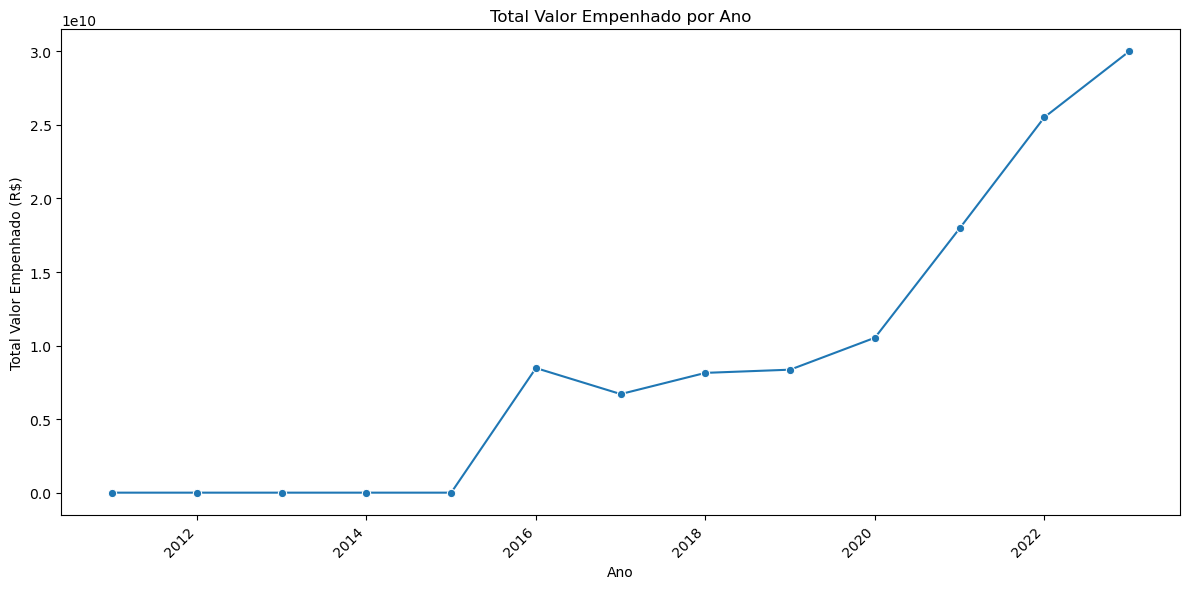

In [42]:
# Agrupar por ano e calcular o total de valor empenhado
total_por_ano = dadospronto.groupby('Ano')['Valor Total Empenhado (R$)'].sum()

# Criar um gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x=total_por_ano.index, y=total_por_ano.values, marker='o')
plt.title('Total Valor Empenhado por Ano')
plt.xlabel('Ano')
plt.ylabel('Total Valor Empenhado (R$)')
plt.xticks(rotation=45, ha='right')  # Ajustar rotação dos rótulos
plt.tight_layout()  # Ajustar layout
plt.show()


### Itens com maior valor empenhado

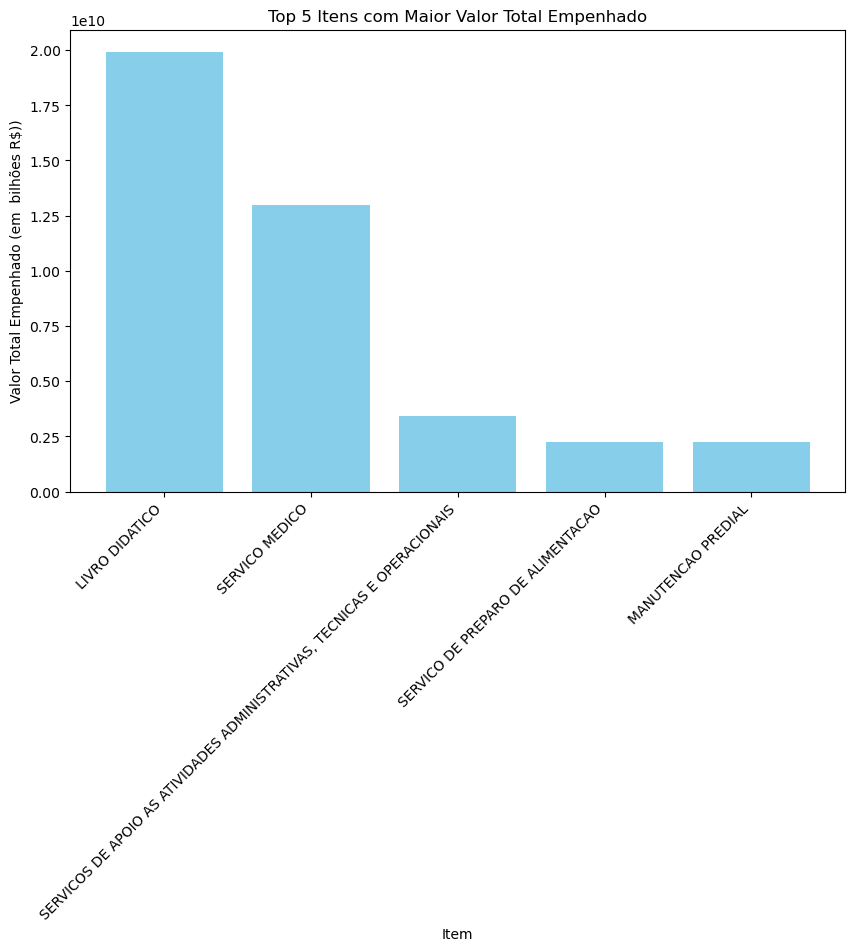

In [43]:
top5_itens = dadospronto.groupby('item')['Valor Total Empenhado (R$)'].sum().sort_values(ascending=False).reset_index().head(5)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top5_itens['item'], top5_itens['Valor Total Empenhado (R$)'], color='skyblue')
plt.title('Top 5 Itens com Maior Valor Total Empenhado')
plt.xlabel('Item')
plt.ylabel('Valor Total Empenhado (em  bilhões R$))')
plt.xticks(rotation=45, ha='right')  # Ajustando a rotação dos rótulos do eixo x para melhor legibilidade
plt.show()

#### Fornecedores com mais movimentação financeira
Podemos perceber que a empresa Photonlux foi disparadamente a que mais fez contrato com o governo, tendo empenhado quase quatro vezes mais do que o segundo colocado. 

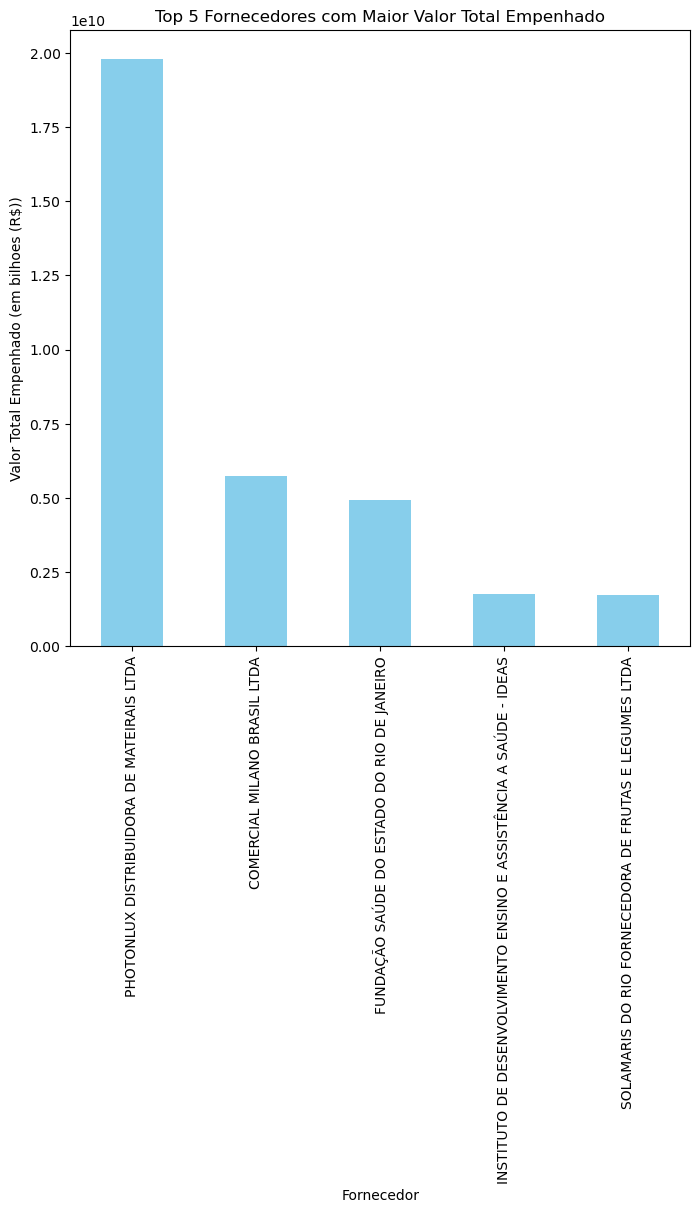

In [44]:
total_empenhado_por_fornecedor = dadospronto.groupby('Fornecedor')['Valor Total Empenhado (R$)'].sum()
top5_fornecedores_valor = total_empenhado_por_fornecedor.nlargest(5)

#  gráfico de barras
plt.figure(figsize=(8, 8))
top5_fornecedores_valor.plot(kind='bar', color='skyblue')
plt.title('Top 5 Fornecedores com Maior Valor Total Empenhado')
plt.xlabel('Fornecedor')
plt.ylabel('Valor Total Empenhado (em bilhoes (R$))')
plt.show()

### Instituições com Maior Valor Empenhado:

De longe, as duas instituições que apresentaram os maiores valores empenhados foram dos setores de saúde e educação, representadas pela SEDUC e FES, respectivamente. Vale ressaltar que o setor de saúde figura entre os cinco primeiros, o que evidencia a hipótese de que a COVID-19 pode ter contribuído para essa movimentação expressiva.

C:\Users\campe\AppData\Local\Temp\ipykernel_8656\2982000152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_unidades['Valor Total Empenhado (R$)'] = top5_unidades['Valor Total Empenhado (R$)'] / 1000000
C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\campe\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\campe\anaconda3\Lib\sit

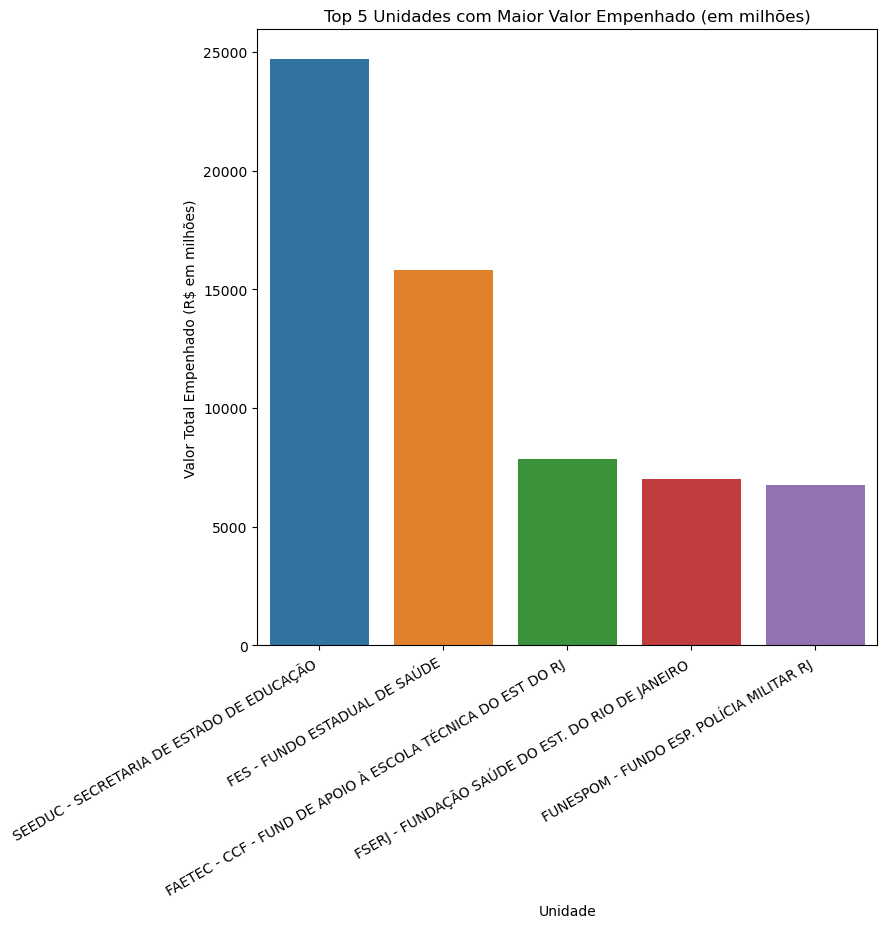

In [45]:

valorunidade = dadospronto.groupby('Unidade')['Valor Total Empenhado (R$)'].sum().reset_index()
valorunidade = valorunidade.sort_values(by='Valor Total Empenhado (R$)', ascending=False)
top5_unidades = valorunidade.head(5)
top5_unidades['Valor Total Empenhado (R$)'] = top5_unidades['Valor Total Empenhado (R$)'] / 1000000

# 5. Criando um gráfico de barras 
plt.figure(figsize=(8, 8))
sns.barplot(x='Unidade', y='Valor Total Empenhado (R$)', data=top5_unidades)
plt.title('Top 5 Unidades com Maior Valor Empenhado (em milhões)')
plt.xlabel('Unidade')
plt.ylabel('Valor Total Empenhado (R$ em milhões)')
plt.xticks(rotation=30, ha='right')  # Ajustar rotação dos rótulos
plt.show()


### conclusão
A análise revelou insights significativos sobre a distribuição do valor empenhado em diferentes categorias. Notavelmente, uma parte substancial dos recursos está direcionada para itens relacionados à saúde, educação e alimentos. Além disso, destaca-se o fornecedor Photonlux, que lidera com quase quatro vezes mais valor empenhado em comparação com a segunda colocada, a Comercial Milano. De acordo com minha pesquisa, a Photonlux é uma gráfica especializada em livros didáticos, indicando uma forte presença e liderança no mercado dessa categoria.

No que diz respeito às instituições que mais realizaram contratações, a SEDUC (Secretaria de Educação) e a FES (Fundação de Educação Superior) figuram como líderes. Essa tendência é compreensível, uma vez que investimentos expressivos do estado geralmente são direcionados para os setores de saúde e educação. Esses resultados fornecem uma visão valiosa sobre a distribuição de recursos e podem ser úteis para estratégias futuras de alocação de orçamento.







#### salvando base de dados limpa

In [46]:
import csv

In [47]:
import pandas as pd

# Supondo que 'dadospronto' seja o DataFrame que você tratou e deseja salvar

# Especifique o caminho completo do arquivo CSV
caminho_arquivo_csv = r'C:\Users\campe\OneDrive\Documentos\dsa\dadospronto.csv'

# Use o método to_csv para salvar o DataFrame em um arquivo CSV
dadospronto.to_csv(caminho_arquivo_csv, index=False, sep=';')

print(f"O conjunto de dados foi salvo em {caminho_arquivo_csv}")



O conjunto de dados foi salvo em C:\Users\campe\OneDrive\Documentos\dsa\dadospronto.csv
